# Import Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [2]:
# importing data
path = '/Users/tannu/Desktop/Data Analytics/Instacart Basket Analysis Dec-2025 '
df = dd.read_parquet(os.path.join(path, '2 Data', 'Prepared Data', 'cust_ords_prods.parquet'))

In [9]:
df.head(2)

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,price_range,busiest_day,busiest_hours,max_order,loyalty_flag,average_spent,spending_flag,order_frequency,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly Busy,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly Busy,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular Customer,both


### Q. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

In [18]:
# Convert Dask Series to Pandas, drop NaNs (if any)
order_hour_of_day = df['order_hour_of_day'].dropna().compute()

Text(0.5, 1.0, 'Distribution of Orders by Hour of Day')

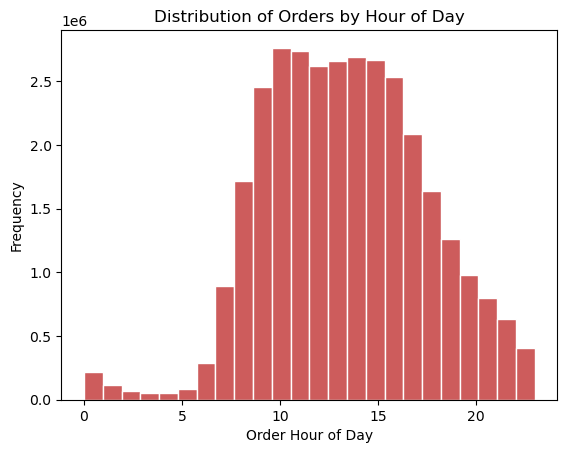

In [21]:
# plotting a histogram
hist = order_hour_of_day.plot.hist(bins = 24, color = 'indianred', edgecolor = 'white')
hist.set_xlabel("Order Hour of Day")
hist.set_ylabel("Frequency")
hist.set_title("Distribution of Orders by Hour of Day")

#### The histogram depicts the density of orders based on hours of the day for Instacart. The maximum number of orders happen around 10 am while the lowest traffic is observed around 3 am. The orders start picking up around 7 am and the peak hours are from 9 am to 4 pm. 

In [22]:
# exporting the histogram
hist.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'hist_hour_of_day.png'))

### Q. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [23]:
# Convert Dask Series to Pandas, drop NaNs (if any)
loyalty_flag = df['loyalty_flag'].dropna().compute()

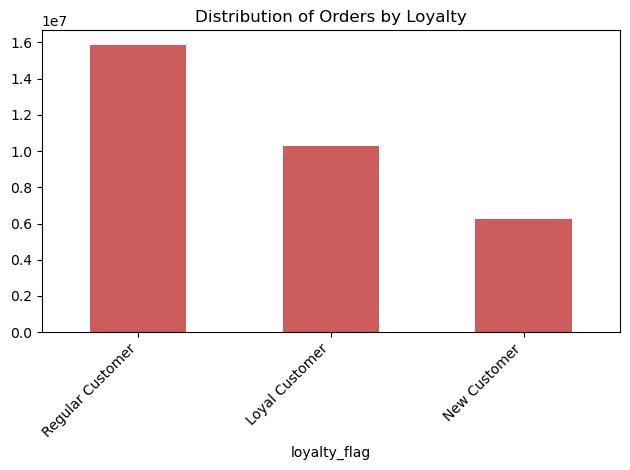

In [26]:
# plotting a bar chart from 'loyalty_flag' column
bar = loyalty_flag.value_counts().plot.bar(color = 'indianred')
bar.set_title("Distribution of Orders by Loyalty")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### The maximum number of customers belong to the 'Regular Customer' category.

In [27]:
# exporting the bar chart
bar.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

### Q. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

#### Sampling: We will create samples of our dataset for easy computation of data.

In [3]:
# Creating a random reproducible sample with 70/30 split (Method used with Dask)
df_big, df_small = df.random_split([0.7, 0.3], random_state=4)

In [4]:
# Create a subset of only the columns we need for the analysis & drop rows where either column is NaN
df_small_subset = df_small[['order_hour_of_day', 'prices', 'age', 'number_of_dependants', 'income']].dropna()

In [5]:
# Convert to Pandas series from Dask series
df_pd = df_small_subset.compute()

Text(0.5, 1.0, 'Expenditure throughout the Day')

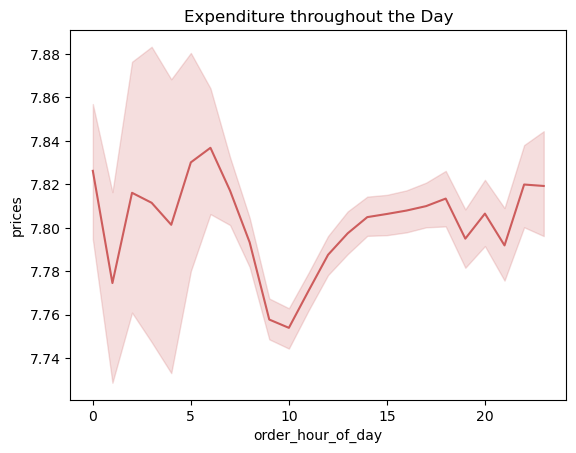

In [6]:
# plotting a line chart with the variables 'prices' and 'order_hour_of_day'
line = sns.lineplot(data = df_pd, x = 'order_hour_of_day', y = 'prices', color = 'indianred')
plt.title('Expenditure throughout the Day')

#### Highest expenditure is observed between 5 am and 6 am. Lowest around 10 am, which is also the peak hours for ordering. This means that during peak hours, people tend to spend less. 

In [7]:
# exporting this line chart
line.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'line_prices_hour_of_day.png'))

### Q. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
### In a markdown cell beneath your line chart, describe what the line chart shows.

Text(0.5, 1.0, 'Relationship between Age & Number of Dependants')

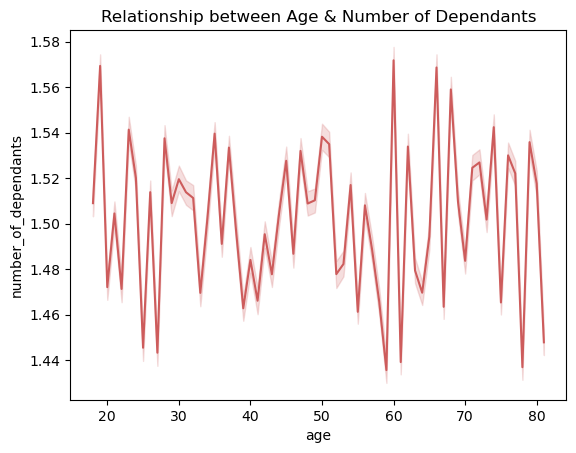

In [8]:
# plotting a line chart with the variables 'age' and 'number_of_dependants'
line2 = sns.lineplot(data = df_pd, x = 'age', y = 'number_of_dependants', color = 'indianred')
plt.title('Relationship between Age & Number of Dependants')

In [9]:
# Calculating mean for 'number_of_dependants'
df_pd['number_of_dependants'].mean()

np.float64(1.5017495999363726)

In [10]:
# Calculating median for 'number_of_dependants'
df_pd['number_of_dependants'].median()

2.0

#### The x-axis depicts age, while the y-axis depicts the number_of_dependants in relation to age. There is no very clear relationship between age & number of dependants. But the average number of dependants for all the customers falls around 1.5. So, most people have 1-2 dependants regardless of their age.

In [9]:
# exporting the above line chart
line2.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'line_age_dependants.png'))

### Q. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

Text(0.5, 1.0, 'Relationship between Age & Income')

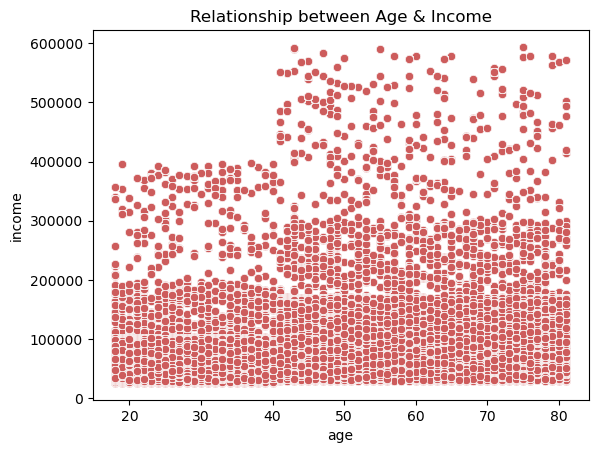

In [10]:
# plotting a scatterplot with the variables 'age' & 'income'
splot = sns.scatterplot(data = df_pd, x = 'age', y = 'income', color = 'indianred')
plt.title('Relationship between Age & Income')

In [14]:
# checking mean for 'income'
df_pd['income'].mean()

np.float64(99425.21474771426)

In [15]:
# checking median for 'income'
df_pd['income'].median()

96629.0

#### The x-axis depicts age, while the y-axis depicts the spending power(income) of the customer. The pattern I can infer from the above graph is that people over the age of 40 are the only ones surpassing the 400000 mark. Though maximum people across all ages have income in the range 50000 - 200000.

In [11]:
# exporting the scatterplot
splot.figure.savefig(os.path.join(path, '4 Analysis', 'Visualizations', 'splot_age_income.png'))